## Aprendizaje de maquina - TP 6 (Spotify)

### Importando bibliotecas

In [9]:
pip install umap-learn

     |████████████████████████████████| 81kB 3.7MB/s 
     |████████████████████████████████| 1.2MB 28.8MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-cp37-none-any.whl size=76569 sha256=b5eafa9b0e53114201499a7503a3f991223d1c291468b3f778cd9f725ad54275
  Stored in directory: /root/.cache/pip/wheels/ad/df/d5/a3691296ff779f25cd1cf415a3af954b987fb53111e3392cf4
  Created wheel for pynndescent: filename=pynndescent-0.5.2-cp37-none-any.whl size=51362 sha256=ff26b6f226aadfb52d320a70b08fbed27f82a8f93a7d1c309755fb5d09f956f3
  Stored in directory: /root/.cache/pip/wheels/ba/52/4e/4c28d04d144a28f89e2575fb63628df6e6d49b56c5ddd0c74e
Successfully built umap-learn pynndescent


In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import umap
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

### Carga y analisis de datos

In [2]:
spotify_data = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBOM/data/attributes_spotify.csv")

In [4]:
spotify_data.head(2)

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.02190,2,0.165,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.00611,1,0.137,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino


In [6]:
spotify_data.dtypes

Unnamed: 0            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature      float64
valence             float64
target                int64
song_title           object
artist               object
dtype: object

El dataset tiene dos variables categoricas, estas seran dropeadas para el analisis. Ademas, tiene una variable sin nombre que tambien sera dropeada.

### Preparacion de datos

In [13]:
spotify_data_copy = spotify_data.copy()

Drop de las variables que no usaremos

In [14]:
spotify_data_copy = spotify_data_copy.drop(columns = ['Unnamed: 0', 'song_title', 'artist'])

In [16]:
spotify_data_copy.head(2)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,0.0102,0.833,204600,0.434,0.02190,2,0.165,-8.795,1,0.4310,150.062,4.0,0.286,1
1,0.1990,0.743,326933,0.359,0.00611,1,0.137,-10.401,1,0.0794,160.083,4.0,0.588,1


Escalado de las variables para PCA

In [19]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(spotify_data_copy)

### PCA

#### Creando el modelo y analizandolo

In [20]:
model_pca = PCA()

In [21]:
model_pca.fit_transform(scaled_data)

array([[-0.33661052, -1.20102749, -0.25770423, ..., -1.06807757,
         0.40647623, -0.36151919],
       [ 1.03178495, -1.1738363 , -0.21206695, ..., -0.80077775,
         0.38772854, -0.42781049],
       [ 0.17199452, -1.4047125 , -1.00123921, ..., -0.96706792,
         0.02572795, -0.55681358],
       ...,
       [-1.70637349,  1.37095009, -0.94317728, ..., -0.38516151,
        -0.25274254,  0.19418284],
       [-1.29448924,  1.15058   , -0.05007424, ...,  0.39838428,
        -0.15548745, -0.21585911],
       [-1.32263857,  2.20837974,  0.25752427, ..., -0.10575575,
         0.46865087,  0.58377993]])

In [22]:
x_pca = model_pca.fit_transform(scaled_data)

Analizando la varianza explicada por las componentes principales

In [23]:
var_explained =  model_pca.explained_variance_ratio_

var_explained

array([0.203513  , 0.11174403, 0.10485205, 0.08037958, 0.07823763,
       0.07273883, 0.06478836, 0.05718438, 0.0536264 , 0.05143382,
       0.0447698 , 0.03805204, 0.02679908, 0.01188101])

Puede verse que las primeras 3 componentes explican 40% de la varianza, y un 30% las primeras dos

#### Graficando

In [54]:
x_data_copy = spotify_data_copy.reset_index(drop = True)

Armo un dataframe con las componentes obtenidas con PCA y me quedo con las dos primeras para reducir dimensionalidad

In [55]:
pca_components = pd.DataFrame(x_pca)

In [56]:
pca_components_selected = pca_components.iloc[:,[0,1]]

In [57]:
pca_components_selected.head(2)

,0,1
0,-0.336611,-1.201027
1,1.031785,-1.173836


Agrego estas dos componentes al dataframe de datos

In [58]:
x_data_copy[['component_1', 'component_2']] = pca_components_selected

In [59]:
x_data_copy.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,component_1,component_2
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,-0.336611,-1.201027
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,1.031785,-1.173836
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,0.171995,-1.404712
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,3.611166,-0.482608
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,0.545252,-1.243111


Graficando

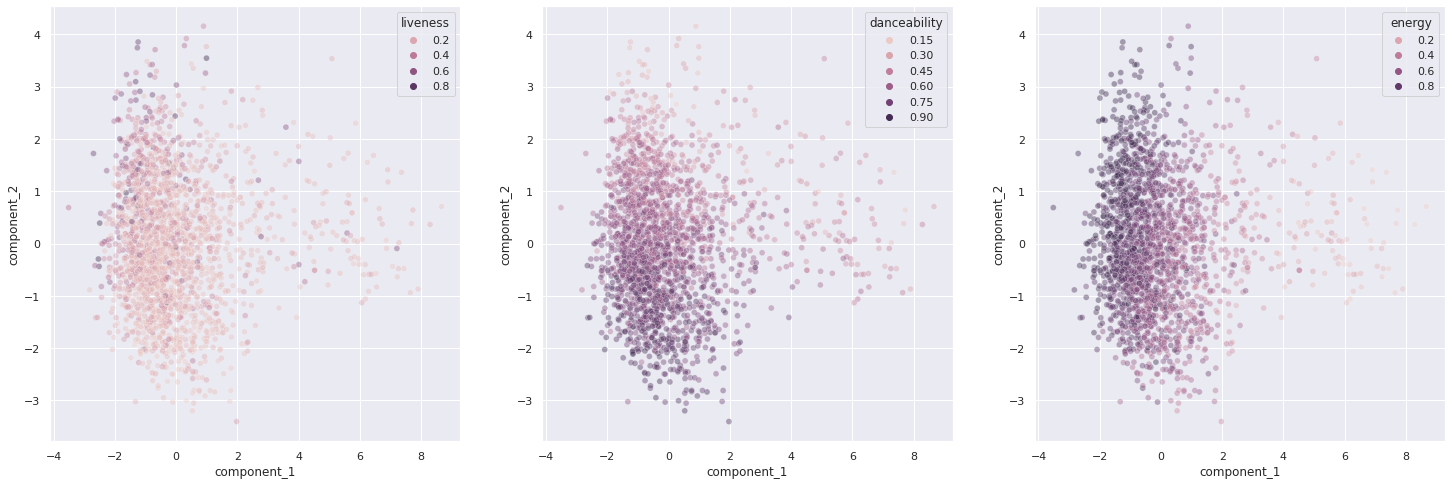

In [60]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25,8))
sns.scatterplot(x = "component_1", y = "component_2", hue = "liveness", data = x_data_copy, alpha = 0.4, ax = ax1)
sns.scatterplot(x = "component_1", y = "component_2", hue = "danceability", data = x_data_copy, alpha = 0.4, ax = ax2)
sns.scatterplot(x = "component_1", y = "component_2", hue = "energy", data = x_data_copy, alpha = 0.4, ax = ax3)

Analizando los graficos, lo que se puede ver es que
<ul>
  <li> Las canciones que tienen mayor energia, son las mas bailables </li>
  <li> Hay algunas canciones con valor alto de energia que estan en vivo </li>
</ul>

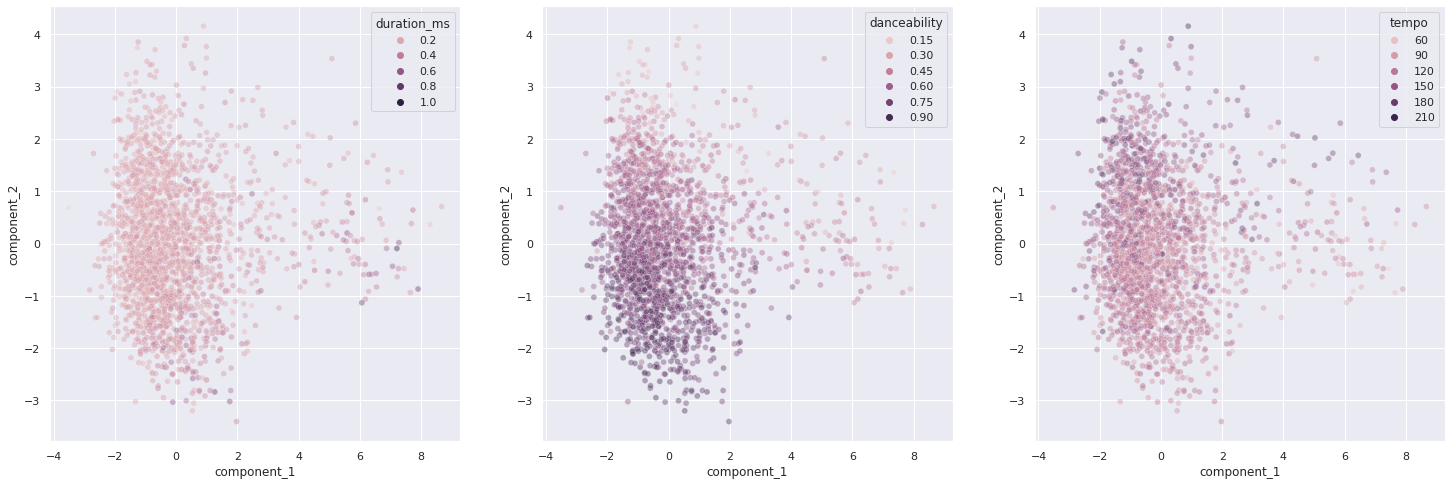

In [61]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25,8))
sns.scatterplot(x = "component_1", y = "component_2", hue = "duration_ms", data = x_data_copy, alpha = 0.4, ax = ax1)
sns.scatterplot(x = "component_1", y = "component_2", hue = "danceability", data = x_data_copy, alpha = 0.4, ax = ax2)
sns.scatterplot(x = "component_1", y = "component_2", hue = "tempo", data = x_data_copy, alpha = 0.4, ax = ax3)

Analizando los graficos, lo que se puede ver es que
<ul>
  <li> Las canciones mas bailables, tienen tempos mayores </li>
  <li> La energia y lo propensa al baile que son las canciones, no dependen de su duracion </li>
</ul>

### UMAP

#### Preparando los datos, creando el modelo y analizandolo

In [42]:
x_scaled = StandardScaler().fit_transform(spotify_data_copy)

In [43]:
model_umap = umap.UMAP()

In [44]:
model_umap.fit(x_scaled)

UMAP(a=None, angular_rp_forest=False, b=None, dens_frac=0.0, dens_lambda=0.0,
     dens_var_shift=0.1, densmap=False, disconnection_distance=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=True, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None, n_jobs=-1,
     n_neighbors=15, negative_sample_rate=5, output_dens=False,
     output_metric='euclidean', output_metric_kwds=None, random_state=None,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None, ...)

In [45]:
embedding = model_umap.fit_transform(x_scaled)

#### Graficando

In [46]:
x_data_copy = spotify_data_copy.copy()
x_data_copy = x_data_copy.reset_index(drop=True)
x_data_copy[['dim1', 'dim2']] = embedding

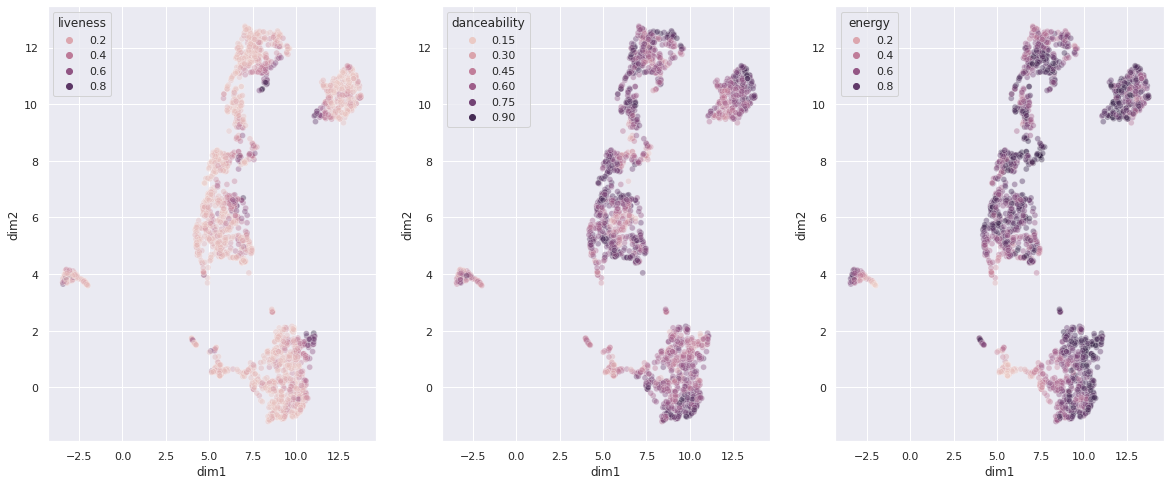

In [49]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,8))
sns.scatterplot(x = "dim1", y = "dim2", hue = "liveness", data = x_data_copy, alpha = 0.4, ax = ax1)
sns.scatterplot(x = "dim1", y = "dim2", hue = "danceability", data = x_data_copy, alpha = 0.4, ax = ax2)
sns.scatterplot(x = "dim1", y = "dim2", hue = "energy", data = x_data_copy, alpha = 0.4, ax = ax3)

Si bien los graficos cambian, se pueden observar las mismas conclusiones que antes, ya que las canciones mas bailables son aquellas con mayor energia. Sin embargo aca se observa con mayor claridad que algunas canciones bailables con mucha energia, tienen un alto valor de vivo.

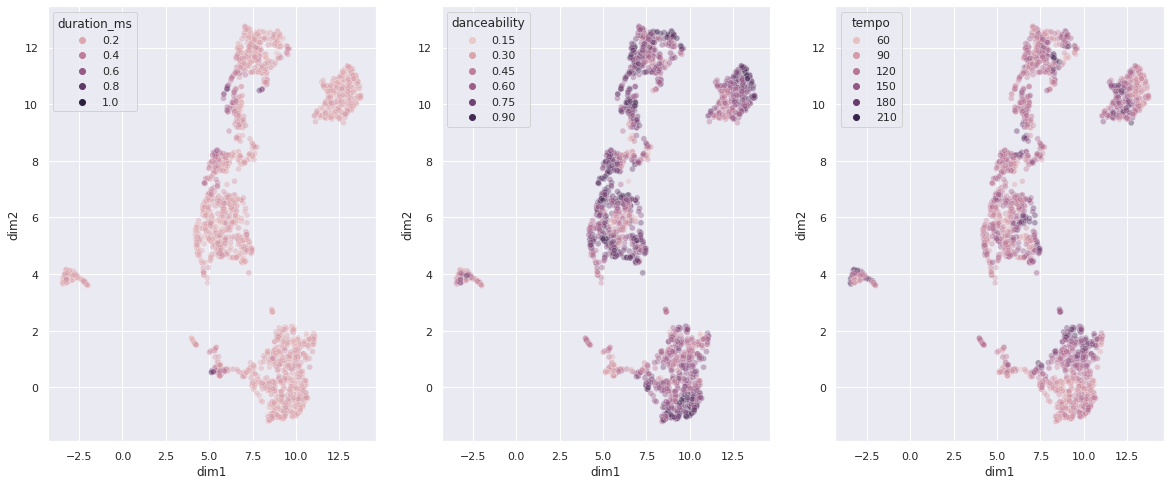

In [51]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,8))
sns.scatterplot(x = "dim1", y = "dim2", hue = "duration_ms", data = x_data_copy, alpha = 0.4, ax = ax1)
sns.scatterplot(x = "dim1", y = "dim2", hue = "danceability", data = x_data_copy, alpha = 0.4, ax = ax2)
sns.scatterplot(x = "dim1", y = "dim2", hue = "tempo", data = x_data_copy, alpha = 0.4, ax = ax3)

Nuevamente los graficos cambian, pero aca puede observarse que no todos los temas bailables tiene un tempo alto. Por otra parte, siguen siendo ambas propiedades independientes del tiempo de duracion.